## Comparative by state and city on the border in US 

We analyze how employment, wages and the number of factories in Mexico evolved between 2007 and 2021. Also between 2016 and 2021

The border counties are:  San Diego (CA), Imperial (CA), Yuma (AZ), Pima (AZ), Santa Cruz (AZ), Cochise (AZ), Hidalgo (NM), Luna (NM) , Doña Ana (NM), El Paso (TX), Hudspeth (TX) , Jeff Davis (TX),  Presidio(TX),  Brewster(TX), Terrell (TX) , Val Verde(TX),  Kinney(TX) , Maverick(TX),  Webb(TX) , Zapata(TX),  Starr(TX) , Hidalgo(TX) ,  Cameron(TX)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [3]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Open Manufacturing workers data
df = pd.read_csv("data/jobs-wages-population-us-merged-by-county.csv")
df

,Year,County,State,Description,Value,Border State,Border County
0,2007,Autauga,Alabama,Total Jobs,"14,956.00",No,No
1,2007,Baldwin,Alabama,Total Jobs,"81,452.00",No,No
2,2007,Barbour,Alabama,Total Jobs,"11,323.00",No,No
3,2007,Bibb,Alabama,Total Jobs,"4,885.00",No,No
4,2007,Blount,Alabama,Total Jobs,"11,974.00",No,No
...,...,...,...,...,...,...,...
420640,2021,Sweetwater,Wyoming,Population,"41,614.00",No,No
420641,2021,Teton,Wyoming,Population,"23,575.00",No,No
420642,2021,Uinta,Wyoming,Population,"20,635.00",No,No
420643,2021,Washakie,Wyoming,Population,"7,705.00",No,No


In [5]:
df["Description"].unique()

array(['Total Jobs', 'Construction Jobs', 'Manufacturing Jobs',
       'Transportation Jobs', 'Total Income', 'Construction Income',
       'Manufacturing Income', 'Transportation Income', 'Population'],
      dtype=object)

In [6]:
df

,Year,County,State,Description,Value,Border State,Border County
0,2007,Autauga,Alabama,Total Jobs,"14,956.00",No,No
1,2007,Baldwin,Alabama,Total Jobs,"81,452.00",No,No
2,2007,Barbour,Alabama,Total Jobs,"11,323.00",No,No
3,2007,Bibb,Alabama,Total Jobs,"4,885.00",No,No
4,2007,Blount,Alabama,Total Jobs,"11,974.00",No,No
...,...,...,...,...,...,...,...
420640,2021,Sweetwater,Wyoming,Population,"41,614.00",No,No
420641,2021,Teton,Wyoming,Population,"23,575.00",No,No
420642,2021,Uinta,Wyoming,Population,"20,635.00",No,No
420643,2021,Washakie,Wyoming,Population,"7,705.00",No,No


In [7]:
dfcal_jtot = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Total Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfcal_jm = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Manufacturing Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfcal_jc = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Construction Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfcal_jt = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Transportation Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfcal_itot = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Total Income'") , values='Value', index=['Year'], columns='County').copy()
dfcal_im = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Manufacturing Income'") , values='Value', index=['Year'], columns='County').copy()
dfcal_ic = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Construction Income'") , values='Value', index=['Year'], columns='County').copy()
dfcal_it = pd.pivot_table(df.query("State == 'California' & `Border County` == 'Yes' & Description == 'Transportation Income'") , values='Value', index=['Year'], columns='County').copy()


In [8]:
tdfcal_jtot = dfcal_jtot.copy()
tdfcal_jm= dfcal_jm.copy()
tdfcal_jc= dfcal_jc.copy()
tdfcal_jt=dfcal_jt.copy()
tdfcal_itot=dfcal_itot.copy()
tdfcal_im=dfcal_im.copy()
tdfcal_ic=dfcal_ic.copy()
tdfcal_it=dfcal_it.copy()

In [9]:
for i in dfcal_jtot.columns:
    dfcal_jtot[i] = dfcal_jtot[i] / dfcal_jtot[i].iat[0] * 100 
for i in dfcal_jm.columns:
    dfcal_jm[i] = dfcal_jm[i] / dfcal_jm[i].iat[0] * 100 
for i in dfcal_jc.columns:
    dfcal_jc[i] = dfcal_jc[i] / dfcal_jc[i].iat[0] * 100
for i in dfcal_jt.columns:
    dfcal_jt[i] = dfcal_jt[i] / dfcal_jt[i].iat[0] * 100 
for i in dfcal_itot.columns:
    dfcal_itot[i] = dfcal_itot[i] / dfcal_itot[i].iat[0] * 100 
for i in dfcal_im.columns:
    dfcal_im[i] = dfcal_im[i] / dfcal_im[i].iat[0] * 100 
for i in dfcal_ic.columns:
    dfcal_ic[i] = dfcal_ic[i] / dfcal_ic[i].iat[0] * 100 
for i in dfcal_it.columns:
    dfcal_it[i] = dfcal_it[i] / dfcal_it[i].iat[0] * 100 

In [10]:
dfnm_jtot = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Total Jobs' & County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_jm = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Manufacturing Jobs'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_jc = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Construction Jobs'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_jt = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Transportation Jobs'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_itot = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Total Income'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_im = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Manufacturing Income'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_ic = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Construction Income'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()
dfnm_it = pd.pivot_table(df.query("State == 'New Mexico' & `Border County` == 'Yes' & Description == 'Transportation Income'& County != 'Hidalgo'") , values='Value', index=['Year'], columns='County').copy()


In [11]:
tdfnm_jtot = dfnm_jtot.copy()
tdfnm_jm= dfnm_jm.copy()
tdfnm_jc= dfnm_jc.copy()
tdfnm_jt=dfnm_jt.copy()
tdfnm_itot=dfnm_itot.copy()
tdfnm_im=dfnm_im.copy()
tdfnm_ic=dfnm_ic.copy()
tdfnm_it=dfnm_it.copy()

In [12]:
for i in dfnm_jtot.columns:
    dfnm_jtot[i] = dfnm_jtot[i] / dfnm_jtot[i].iat[0] * 100 
for i in dfnm_jm.columns:
    dfnm_jm[i] = dfnm_jm[i] / dfnm_jm[i].iat[0] * 100 
for i in dfnm_jc.columns:
    dfnm_jc[i] = dfnm_jc[i] / dfnm_jc[i].iat[0] * 100 
for i in dfnm_jt.columns:
    dfnm_jt[i] = dfnm_jt[i] / dfnm_jt[i].iat[0] * 100
for i in dfnm_itot.columns:
    dfnm_itot[i] = dfnm_jt[i] / dfnm_itot[i].iat[0] * 100 
for i in dfnm_im.columns:
    dfnm_im[i] = dfnm_im[i] / dfnm_im[i].iat[0] * 100 
for i in dfnm_ic.columns:
    dfnm_ic[i] = dfnm_ic[i] / dfnm_ic[i].iat[0] * 100 
for i in dfnm_it.columns:
    dfnm_it[i] = dfnm_it[i] / dfnm_it[i].iat[0] * 100 

In [13]:
dfar_jtot = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Total Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfar_jm = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Manufacturing Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfar_jc = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Construction Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfar_jt = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Transportation Jobs'") , values='Value', index=['Year'], columns='County').copy()
dfar_itot = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Total Income'") , values='Value', index=['Year'], columns='County').copy()
dfar_im = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Manufacturing Income'") , values='Value', index=['Year'], columns='County').copy()
dfar_ic = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Construction Income'") , values='Value', index=['Year'], columns='County').copy()
dfar_it = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Transportation Income'") , values='Value', index=['Year'], columns='County').copy()

In [14]:
tdfar_jtot = dfar_jtot.copy()
tdfar_jm= dfar_jm.copy()
tdfar_jc= dfar_jc.copy()
tdfar_jt=dfar_jt.copy()
tdfar_itot=dfar_itot.copy()
tdfar_im=dfar_im.copy()
tdfar_ic=dfar_ic.copy()
tdfar_it=dfar_it.copy()

In [15]:
for i in dfar_jtot.columns:
    dfar_jtot[i] = dfar_jtot[i] / dfar_jtot[i].iat[0] * 100 
for i in dfar_jm.columns:
    dfar_jm[i] = dfar_jm[i] / dfar_jm[i].iat[0] * 100 
for i in dfar_jc.columns:
    dfar_jc[i] = dfar_jc[i] / dfar_jc[i].iat[0] * 100 
for i in dfar_jt.columns:
    dfar_jt[i] = dfar_jt[i] / dfar_jt[i].iat[0] * 100 
for i in dfar_itot.columns:
    dfar_itot[i] = dfar_jt[i] / dfar_itot[i].iat[0] * 100 
for i in dfar_im.columns:
    dfar_im[i] = dfar_im[i] / dfar_im[i].iat[0] * 100 
for i in dfar_ic.columns:
    dfar_ic[i] = dfar_ic[i] / dfar_ic[i].iat[0] * 100 
for i in dfar_it.columns:
    dfar_it[i] = dfar_it[i] / dfar_it[i].iat[0] * 100 

In [16]:
dftx_jtot = pd.pivot_table(df.query("State == 'Texas' & `Border County` == 'Yes' & Description == 'Total Jobs'") , values='Value', index=['Year'], columns='County').copy()
dftx_jm = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Manufacturing Jobs'") , values='Value', index=['Year'], columns='County').copy()
dftx_jc = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Construction Jobs'") , values='Value', index=['Year'], columns='County').copy()
dftx_jt = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Transportation Jobs'") , values='Value', index=['Year'], columns='County').copy()
dftx_itot = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Total Income'") , values='Value', index=['Year'], columns='County').copy()
dftx_im = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Manufacturing Income'") , values='Value', index=['Year'], columns='County').copy()
dftx_ic = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Construction Income'") , values='Value', index=['Year'], columns='County').copy()
dftx_it = pd.pivot_table(df.query("State == 'Arizona' & `Border County` == 'Yes' & Description == 'Transportation Income'") , values='Value', index=['Year'], columns='County').copy()

In [17]:
tdftx_jtot = dftx_jtot.copy()
tdftx_jm= dftx_jm.copy()
tdftx_jc= dftx_jc.copy()
tdftx_jt=dftx_jt.copy()
tdftx_itot=dftx_itot.copy()
tdftx_im=dftx_im.copy()
tdftx_ic=dftx_ic.copy()
tdftx_it=dftx_it.copy()

In [18]:
for i in dftx_jtot.columns:
    dftx_jtot[i] = dftx_jtot[i] / dftx_jtot[i].iat[0] * 100 
for i in dftx_jm.columns:
    dftx_jm[i] = dftx_jm[i] / dftx_jm[i].iat[0] * 100 
for i in dftx_jc.columns:
    dftx_jc[i] = dftx_jc[i] / dftx_jc[i].iat[0] * 100 
for i in dftx_jt.columns:
    dftx_jt[i] = dftx_jt[i] / dftx_jt[i].iat[0] * 100 
for i in dftx_itot.columns:
    dftx_itot[i] = dftx_jt[i] / dftx_itot[i].iat[0] * 100 
for i in dftx_im.columns:
    dftx_im[i] = dftx_im[i] / dftx_im[i].iat[0] * 100 
for i in dftx_ic.columns:
    dftx_ic[i] = dftx_ic[i] / dftx_ic[i].iat[0] * 100 
for i in dftx_it.columns:
    dftx_it[i] = dftx_it[i] / dftx_it[i].iat[0] * 100 

### California

#### Total jobs

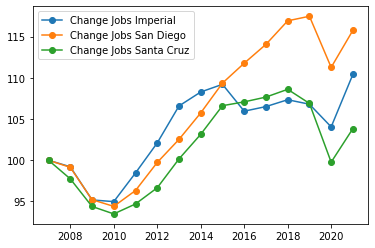

In [19]:
# Create a graphic 

x1 = dfcal_jtot.index
y1 = dfcal_jtot["Imperial"]

x2 = dfcal_jtot.index
y2 = dfcal_jtot["San Diego"]

x3 = dfcal_jtot.index
y3 = dfcal_jtot["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Change Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Change Jobs Santa Cruz")

ax.legend()


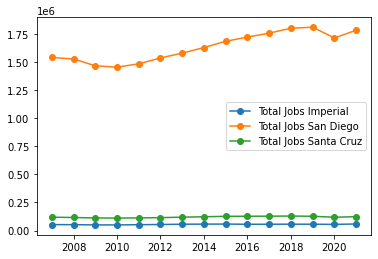

In [20]:
# Create a graphic 

x1 = tdfcal_jtot.index
y1 = tdfcal_jtot["Imperial"]

x2 = tdfcal_jtot.index
y2 = tdfcal_jtot["San Diego"]

x3 = tdfcal_jtot.index
y3 = tdfcal_jtot["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Total Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Total Jobs Santa Cruz")

ax.legend()

# plt.show()

#### Manufacturing jobs

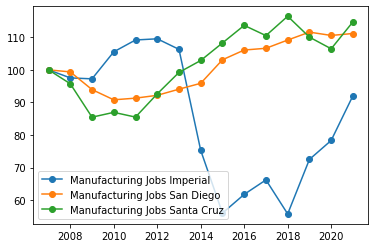

In [21]:
# Create a graphic 

x1 = dfcal_jm.index
y1 = dfcal_jm["Imperial"]

x2 = dfcal_jm.index
y2 = dfcal_jm["San Diego"]

x3 = dfcal_jm.index
y3 = dfcal_jm["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Manufacturing Jobs Santa Cruz")

ax.legend()


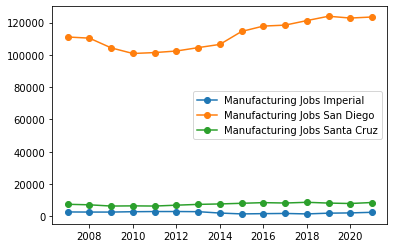

In [22]:
# Create a graphic 

x1 = tdfcal_jm.index
y1 = tdfcal_jm["Imperial"]

x2 = tdfcal_jm.index
y2 = tdfcal_jm["San Diego"]

x3 = tdfcal_jm.index
y3 = tdfcal_jm["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Manufacturing Jobs Santa Cruz")

ax.legend()


### Construction jobs

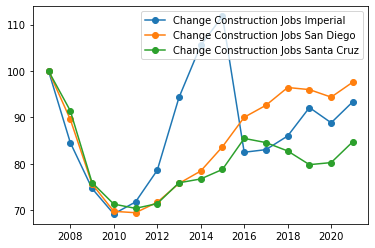

In [23]:
# Create a graphic 

x1 = dfcal_jc.index
y1 = dfcal_jc["Imperial"]

x2 = dfcal_jc.index
y2 = dfcal_jc["San Diego"]

x3 = dfcal_jc.index
y3 = dfcal_jc["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change Construction Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Change Construction Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Change Construction Jobs Santa Cruz")

ax.legend()


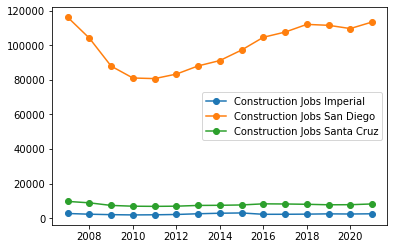

In [24]:
# Create a graphic 

x1 = tdfcal_jc.index
y1 = tdfcal_jc["Imperial"]

x2 = tdfcal_jc.index
y2 = tdfcal_jc["San Diego"]

x3 = tdfcal_jc.index
y3 = tdfcal_jc["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Construction Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Construction Jobs Santa Cruz")

ax.legend()


### Transportation jobs

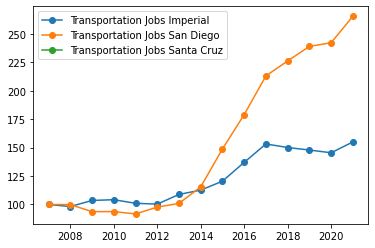

In [25]:
# Create a graphic 

x1 = dfcal_jt.index
y1 = dfcal_jt["Imperial"]

x2 = dfcal_jt.index
y2 = dfcal_jt["San Diego"]

x3 = dfcal_jt.index
y3 = dfcal_jt["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Transportation Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Transportation Jobs Santa Cruz")

ax.legend()


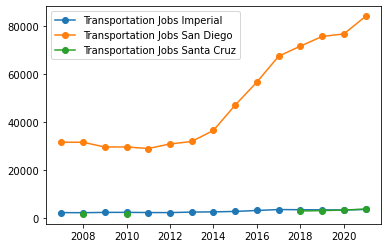

In [26]:
# Create a graphic 

x1 = tdfcal_jt.index
y1 = tdfcal_jt["Imperial"]

x2 = tdfcal_jt.index
y2 = tdfcal_jt["San Diego"]

x3 = tdfcal_jt.index
y3 = tdfcal_jt["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Jobs Imperial")
ax.plot(x2, y2, marker = "o", label = "Transportation Jobs San Diego")
ax.plot(x3, y3, marker = "o", label = "Transportation Jobs Santa Cruz")

ax.legend()


#### Total income

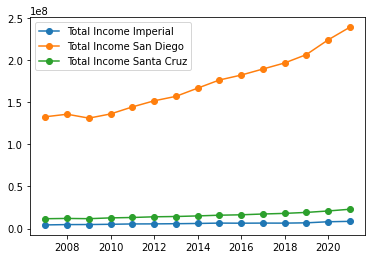

In [27]:
# Create a graphic 

x1 = tdfcal_itot.index
y1 = tdfcal_itot["Imperial"]

x2 = tdfcal_itot.index
y2 = tdfcal_itot["San Diego"]

x3 = tdfcal_itot.index
y3 = tdfcal_itot["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Total Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Total Income Santa Cruz")

ax.legend()


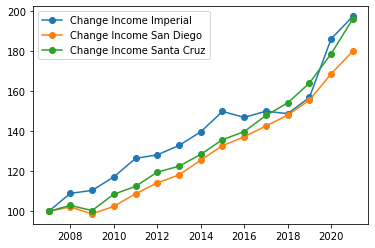

In [28]:
# Create a graphic 

x1 = dfcal_itot.index
y1 = dfcal_itot["Imperial"]

x2 = dfcal_itot.index
y2 = dfcal_itot["San Diego"]

x3 = dfcal_itot.index
y3 = dfcal_itot["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Change Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Change Income Santa Cruz")

ax.legend()


#### Manufacturing income

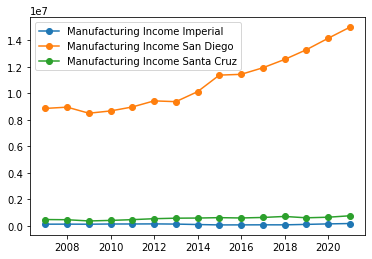

In [29]:
# Create a graphic 

x1 = tdfcal_im.index
y1 = tdfcal_im["Imperial"]

x2 = tdfcal_im.index
y2 = tdfcal_im["San Diego"]

x3 = tdfcal_im.index
y3 = tdfcal_im["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Manufacturing Income Santa Cruz")

ax.legend()


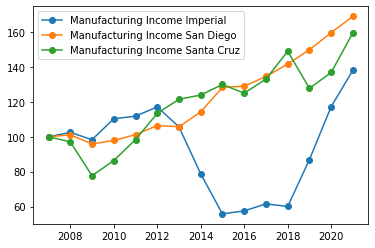

In [30]:
# Create a graphic 

x1 = dfcal_im.index
y1 = dfcal_im["Imperial"]

x2 = dfcal_im.index
y2 = dfcal_im["San Diego"]

x3 = dfcal_im.index
y3 = dfcal_im["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Manufacturing Income Santa Cruz")

ax.legend()


#### Transportation income

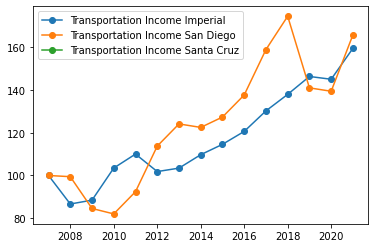

In [31]:
# Create a graphic 

x1 = dfcal_it.index
y1 = dfcal_it["Imperial"]

x2 = dfcal_it.index
y2 = dfcal_it["San Diego"]

x3 = dfcal_it.index
y3 = dfcal_it["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Transportation Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Transportation Income Santa Cruz")

ax.legend()


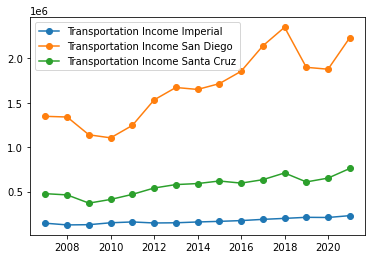

In [32]:
# Create a graphic 

x1 = tdfcal_it.index
y1 = tdfcal_it["Imperial"]

x2 = tdfcal_it.index
y2 = tdfcal_it["San Diego"]

x3 = tdfcal_it.index
y3 = tdfcal_im["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Transportation Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Transportation Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Transportation Income Santa Cruz")

ax.legend()


#### Construction income

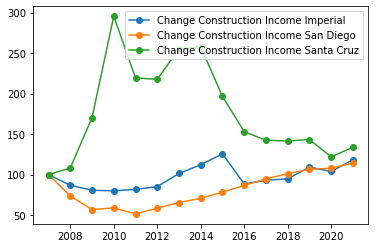

In [33]:
# Create a graphic 

x1 = dfcal_ic.index
y1 = dfcal_ic["Imperial"]

x2 = dfcal_ic.index
y2 = dfcal_ic["San Diego"]

x3 = dfcal_ic.index
y3 = dfcal_ic["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change Construction Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Change Construction Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Change Construction Income Santa Cruz")

ax.legend()


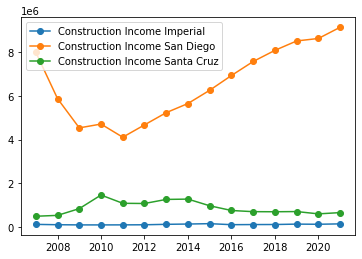

In [34]:
# Create a graphic 

x1 = tdfcal_ic.index
y1 = tdfcal_ic["Imperial"]

x2 = tdfcal_ic.index
y2 = tdfcal_ic["San Diego"]

x3 = tdfcal_ic.index
y3 = tdfcal_ic["Santa Cruz"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Construction Income Imperial")
ax.plot(x2, y2, marker = "o", label = "Construction Income San Diego")
ax.plot(x3, y3, marker = "o", label = "Construction Income Santa Cruz")

ax.legend()


### Arizona

#### Total Jobs

In [35]:
dfar_jtot

County,Cochise,Pima,Santa Cruz,Yuma
Year,,,,
2007,100.00,100.00,100.00,100.00
2008,99.40,98.70,96.44,98.24
2009,97.36,94.66,91.78,91.91
2010,94.55,92.57,91.69,91.44
2011,93.01,93.26,94.33,92.79
2012,90.84,94.47,92.16,94.37
2013,88.15,95.62,96.43,94.88
2014,89.52,97.15,100.88,96.84
2015,89.50,98.43,104.04,100.04


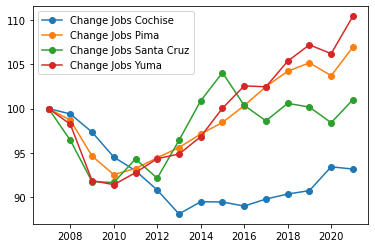

In [36]:
# Create a graphic 

x1 = dfar_jtot.index
y1 = dfar_jtot["Cochise"]

x2 = dfar_jtot.index
y2 = dfar_jtot["Pima"]

x3 = dfar_jtot.index
y3 = dfar_jtot["Santa Cruz"]

x4 = dfar_jtot.index
y4 = dfar_jtot["Yuma"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change Jobs Cochise")
ax.plot(x2, y2, marker = "o", label = "Change Jobs Pima")
ax.plot(x3, y3, marker = "o", label = "Change Jobs Santa Cruz")
ax.plot(x4, y4, marker = "o", label = "Change Jobs Yuma")

ax.legend()

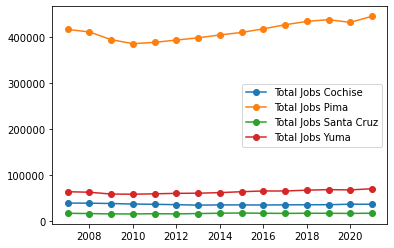

In [37]:
# Create a graphic 

x1 = tdfar_jtot.index
y1 = tdfar_jtot["Cochise"]

x2 = tdfar_jtot.index
y2 = tdfar_jtot["Pima"]

x3 = tdfar_jtot.index
y3 = tdfar_jtot["Santa Cruz"]

x4 = tdfar_jtot.index
y4 = tdfar_jtot["Yuma"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Total Jobs Cochise")
ax.plot(x2, y2, marker = "o", label = "Total Jobs Pima")
ax.plot(x3, y3, marker = "o", label = "Total Jobs Santa Cruz")
ax.plot(x4, y4, marker = "o", label = "Total Jobs Yuma")

ax.legend()

#### Manufacturing Jobs

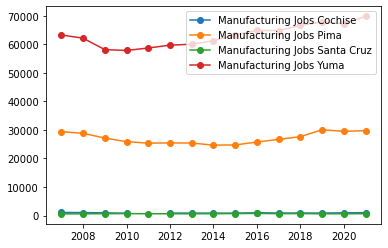

In [38]:
# Create a graphic 

x1 = tdfar_jm.index
y1 = tdfar_jm["Cochise"]

x2 = tdfar_jm.index
y2 = tdfar_jm["Pima"]

x3 = tdfar_jm.index
y3 = tdfar_jm["Santa Cruz"]

x4 = tdfar_jtot.index
y4 = tdfar_jtot["Yuma"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Manufacturing Jobs Cochise")
ax.plot(x2, y2, marker = "o", label = "Manufacturing Jobs Pima")
ax.plot(x3, y3, marker = "o", label = "Manufacturing Jobs Santa Cruz")
ax.plot(x4, y4, marker = "o", label = "Manufacturing Jobs Yuma")

ax.legend()

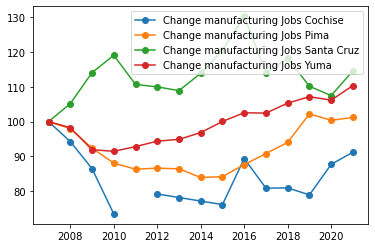

In [39]:
# Create a graphic 

x1 = dfar_jm.index
y1 = dfar_jm["Cochise"]

x2 = dfar_jm.index
y2 = dfar_jm["Pima"]

x3 = dfar_jm.index
y3 = dfar_jm["Santa Cruz"]

x4 = dfar_jtot.index
y4 = dfar_jtot["Yuma"]

fig, ax = plt.subplots()
ax.plot(x1, y1, marker = "o", label = "Change manufacturing Jobs Cochise")
ax.plot(x2, y2, marker = "o", label = "Change manufacturing Jobs Pima")
ax.plot(x3, y3, marker = "o", label = "Change manufacturing Jobs Santa Cruz")
ax.plot(x4, y4, marker = "o", label = "Change manufacturing Jobs Yuma")

ax.legend()

#### Construction Jobs

#### Transportation Jobs

#### Manufacturing Income


#### Construction Income